In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

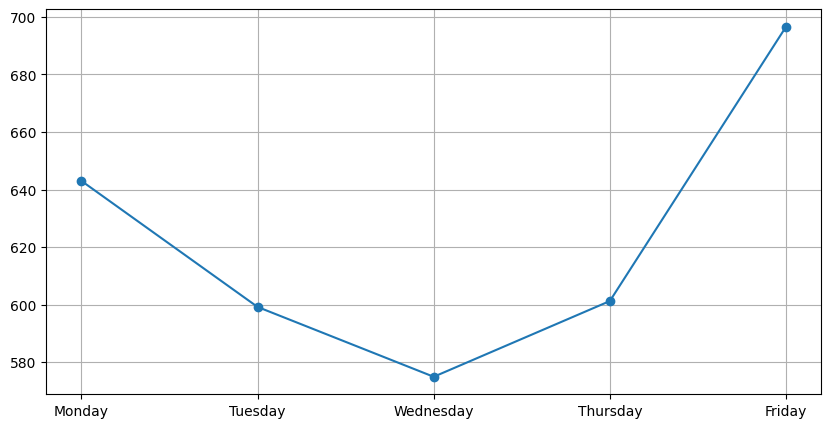

In [11]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['Day_of_Week'] = df['hour_beginning'].dt.dayofweek
weekday_df = df[df['Day_of_Week'] < 5]
weekday_avg = weekday_df.groupby('Day_of_Week')['Pedestrians'].mean()
plt.figure(figsize=(10, 5))
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], weekday_avg, marker='o', linestyle='-')
plt.grid(True)
plt.show()

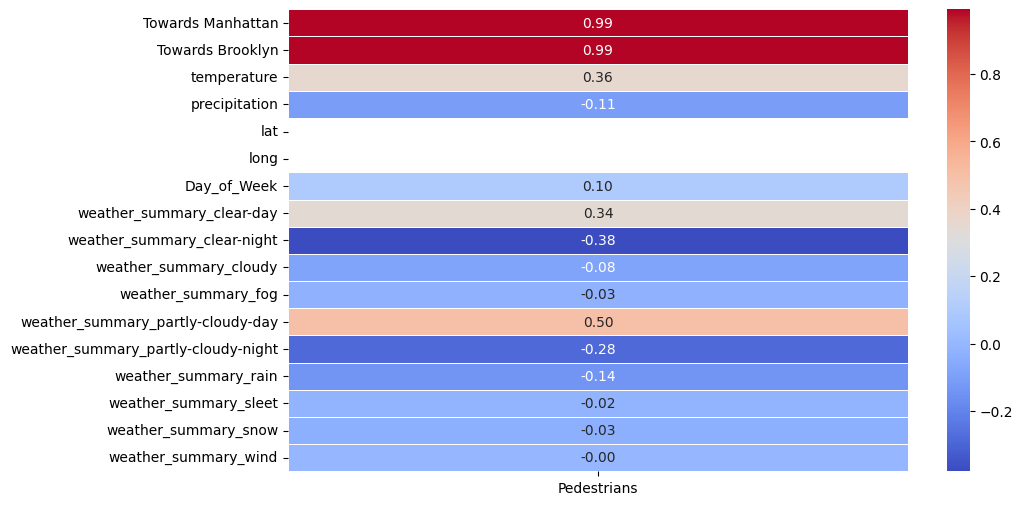

In [12]:
df_2019 = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')]
df_2019 = df_2019.dropna(subset=['weather_summary'])
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])
correlation_matrix = df_2019_encoded.corr(numeric_only=True)
weather_correlation = correlation_matrix[['Pedestrians']].drop(index=['Pedestrians'])
plt.figure(figsize=(10, 6))
sns.heatmap(weather_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

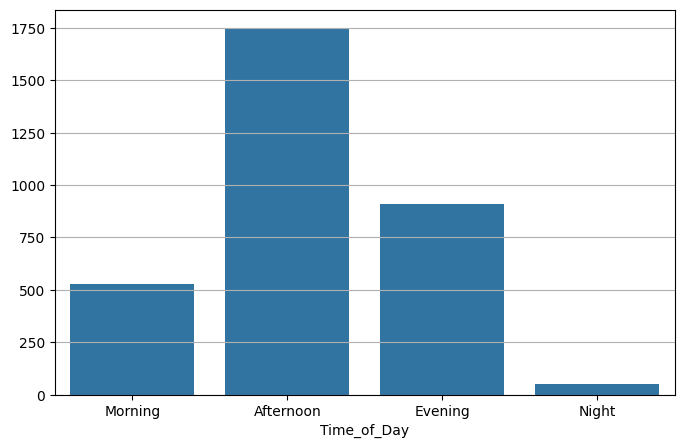

In [13]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df['Time_of_Day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)
time_of_day_avg = df.groupby('Time_of_Day')['Pedestrians'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=time_of_day_avg.index, y=time_of_day_avg.values, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.grid(axis='y')
plt.show()